C:\Users\ico\AppData\Local\Temp\ipykernel_3536\3839322166.py:45: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_diff = intensity - Ic


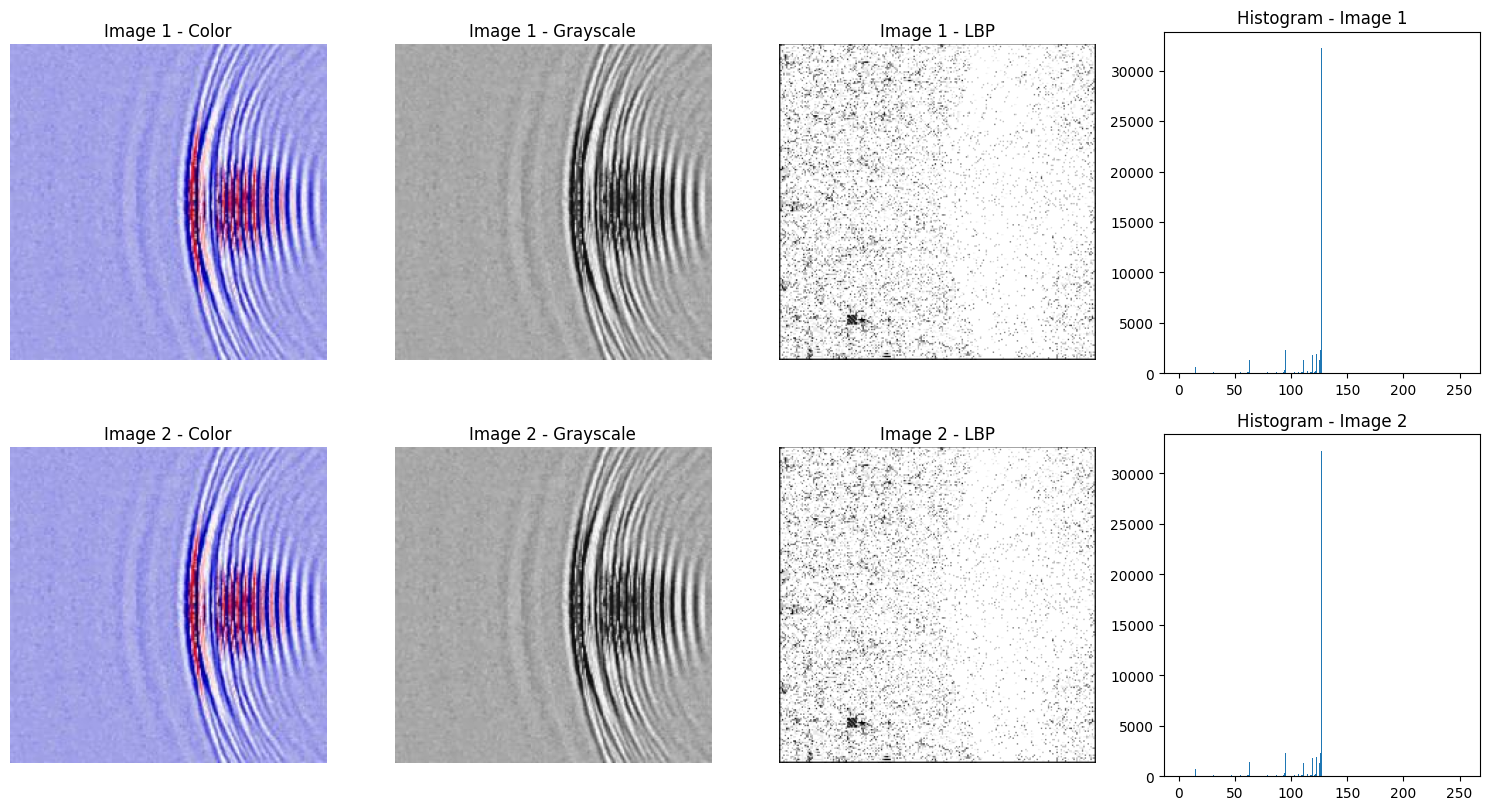

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_lbp_image(image):
    # Convert the color image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define radius and number of neighboring points
    R = 1
    P = 8

    # Get image dimensions
    height, width = grayscale_image.shape

    # Initialize LBP image
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Get the intensity of the current pixel
            Ic = grayscale_image[y, x]

            # Initialize a list to store the intensity differences of neighboring points
            intensity_diffs = []

            # Iterate over each neighboring point within the radius
            for dy in range(-R, R+1):
                for dx in range(-R, R+1):
                    # Skip the central pixel (0, 0)
                    if dy == 0 and dx == 0:
                        continue

                    # Calculate the coordinates of the neighboring point
                    ny = y + dy
                    nx = x + dx

                    # Check if the neighboring point is within the image boundaries
                    if ny >= 0 and ny < height and nx >= 0 and nx < width:
                        # Get the intensity of the neighboring point
                        intensity = grayscale_image[ny, nx]

                        # Calculate the intensity difference and append it to the list
                        intensity_diff = intensity - Ic
                        intensity_diffs.append(intensity_diff)

            # Remove the first value (0) from the intensity differences list
            intensity_diffs = intensity_diffs[1:]

            # Threshold the intensity differences and create the binary array
            binary_array = [1 if diff > 0 else 0 for diff in intensity_diffs]

            # Calculate the decimal value of the binary array using binomial weight 2^p
            decimal_value = sum([bit * 2**i for i, bit in enumerate(binary_array)])

            # Update the corresponding pixel in the LBP image
            lbp_image[y, x] = decimal_value

    return lbp_image

# Load the color images
image_path_1 = 'img_00067.jpg'  # Replace with the actual path to your first color image
image_path_2 = 'img_00067.jpg'  # Replace with the actual path to your second color image
color_image_1 = cv2.imread(image_path_1)
color_image_2 = cv2.imread(image_path_2)

# Convert the color images to grayscale
grayscale_image_1 = cv2.cvtColor(color_image_1, cv2.COLOR_BGR2GRAY)
grayscale_image_2 = cv2.cvtColor(color_image_2, cv2.COLOR_BGR2GRAY)

# Calculate LBP images for both images
lbp_image_1 = calculate_lbp_image(color_image_1)
lbp_image_2 = calculate_lbp_image(color_image_2)

# Plot the images and histograms
plt.figure(figsize=(15, 12))

# Image 1 - Color
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(color_image_1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 - Color')
plt.axis('off')

# Image 1 - Grayscale
plt.subplot(3, 4, 2)
plt.imshow(grayscale_image_1, cmap='gray')
plt.title('Image 1 - Grayscale')
plt.axis('off')

# Image 1 - LBP
plt.subplot(3, 4, 3)
plt.imshow(lbp_image_1, cmap='gray')
plt.title('Image 1 - LBP')
plt.axis('off')

# Image 1 - Histogram
plt.subplot(3, 4, 4)
histogram_1, _ = np.histogram(lbp_image_1.ravel(), bins=256, range=[0, 256])
x = np.arange(256)
plt.bar(x, histogram_1)
plt.title('Histogram - Image 1')

# Image 2 - Color
plt.subplot(3, 4, 5)
plt.imshow(cv2.cvtColor(color_image_2, cv2.COLOR_BGR2RGB))
plt.title('Image 2 - Color')
plt.axis('off')

# Image 2 - Grayscale
plt.subplot(3, 4, 6)
plt.imshow(grayscale_image_2, cmap='gray')
plt.title('Image 2 - Grayscale')
plt.axis('off')

# Image 2 - LBP
plt.subplot(3, 4, 7)
plt.imshow(lbp_image_2, cmap='gray')
plt.title('Image 2 - LBP')
plt.axis('off')

# Image 2 - Histogram
plt.subplot(3, 4, 8)
histogram_2, _ = np.histogram(lbp_image_2.ravel(), bins=256, range=[0, 256])
plt.bar(x, histogram_2)
plt.title('Histogram - Image 2')

plt.tight_layout()
plt.show()
